In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# The column width is 3.35in. 1.5 aspect ratio. 
# You can change the aspect ratio if something else works better for your plot
mpl.rcParams['figure.figsize'] = [3.35, 2.23]

# Title and labels about the same size as the figure caption
mpl.rcParams['font.size'] = 15
mpl.rcParams['figure.titlesize'] = 15

# A legend too big usually gets in the way. 
# AAS recommends at least 6pt font size.
mpl.rcParams['legend.fontsize'] = 16

# I find these appropiate, but you can adjust them to your needs
# AAS recommends a minimum line width of 0.5 pt.
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['lines.linewidth'] = .7
mpl.rcParams['lines.markersize'] = 7


# Sensitivity plot

In [2]:
_E = np.array([40.86982000518911,71.86024939675998,130.52763804649032,229.00194871132365,408.64565359861126,
               717.0334623948247,1301.4219793745847,2321.444580634583,4066.016029616799,7244.471377942968,
               12881.037956045491,22841.381037775263,40514.0387759719,71841.77239590057,125249.9408945374,
               222128.79943544255,400633.60548632,698111.0351406115,])
_LAT_sens_l0_b30 = np.array([5.153724655961664e-12,2.8981523526996577e-12,1.9744882128159428e-12,
                           1.4936279236841406e-12,1.1298747492786165e-12,8.399287059458493e-13,
                           6.353752638084506e-13,5.064603543891735e-13,4.806380863064408e-13,
                           4.482446879289336e-13,5.526170019854132e-13,9.82707436268099e-13,
                           1.687612475788159e-12,3.0010465178188933e-12,5.336699231206324e-12,
                           9.326033468832219e-12,1.6584293294958207e-11,3.162277660168392e-11])
_LAT_sens_l45_b120 = np.array([3.3321709412448236e-12,1.6015682644458437e-12,9.490142360424793e-13,
                           6.579332246575709e-13,4.404933880954328e-13,3.0538555088334375e-13,
                           2.310129700083177e-13,1.9067907229606037e-13,1.9744882128159508e-13,
                           2.230924374408997e-13,3.9672068803654845e-13,7.054802310718689e-13,
                           1.211527658628595e-12,2.1544346900318957e-12,3.831186849557309e-12,
                           6.81292069057965e-12,1.2115276586285901e-11,2.2309243744089878e-11])

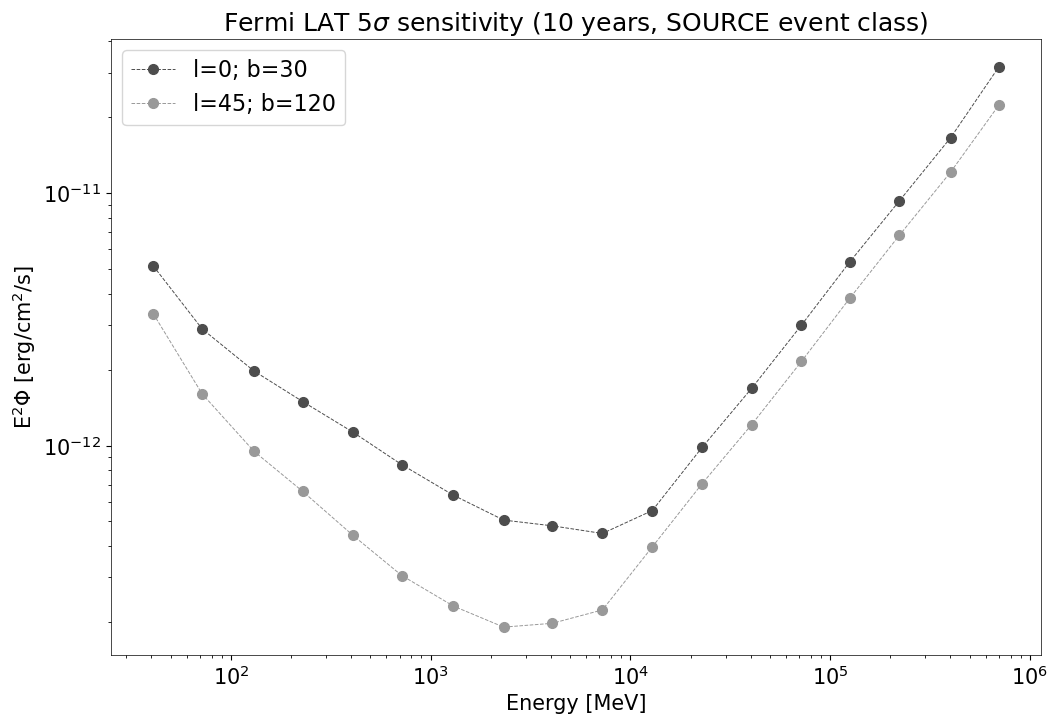

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Fermi LAT 5$\sigma$ sensitivity (10 years, SOURCE event class)')
plt.plot(_E, _LAT_sens_l0_b30, 'o--', color='0.3', label='l=0; b=30')
plt.plot(_E, _LAT_sens_l45_b120, 'o--', color='0.6', label='l=45; b=120')

### We should add here the expected flux level for our stacking analysis

plt.xlabel('Energy [MeV]')
plt.ylabel('E$^2 \Phi$ [erg/cm$^{2}$/s]')
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.savefig('LAT_sensitivity.pdf')

# Map of sources

In [4]:
df = pd.read_csv('EGsTable.csv', delimiter=';', index_col=False)

#drop entries wihtout distance or M_BH value
df.drop(df[df['Distance[Mpc]']=="..."].index,inplace=True)
df.drop(df[df['M_BH[Msolar*10e6]']=="..."].index,inplace=True)

gal_name = df['Name'].values
gal_dist = df['Distance[Mpc]'].values
gal_bhmass = df['M_BH[Msolar*10e6]'].values
gal_b = df['b'].values
gal_l = df['l'].values
gal_l[gal_l>180] = gal_l[gal_l>180] - 360

gal_0_10_Mpc = np.where((gal_dist<=20)&(gal_dist>0))[0]
gal_10_100_Mpc = np.where((gal_dist<=100)&(gal_dist>20))[0]
gal_100_plus_Mpc = np.where(gal_dist>100)[0]

dist_w = 1/(gal_dist/max(gal_dist)) * 2


list_prints = ['M 32', 'NGC 1407', 'NGC 4889', 'NGC 4649']

/var/folders/0s/rjv9nghd171dl20p_w8zd_dm6sg3f4/T/ipykernel_39507/1044226650.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111, projection="mollweide")


M 32  dist =  [0.805]
NGC 1407  dist =  [29.]
NGC 4889  dist =  [102.]
NGC 4649  dist =  [16.46]


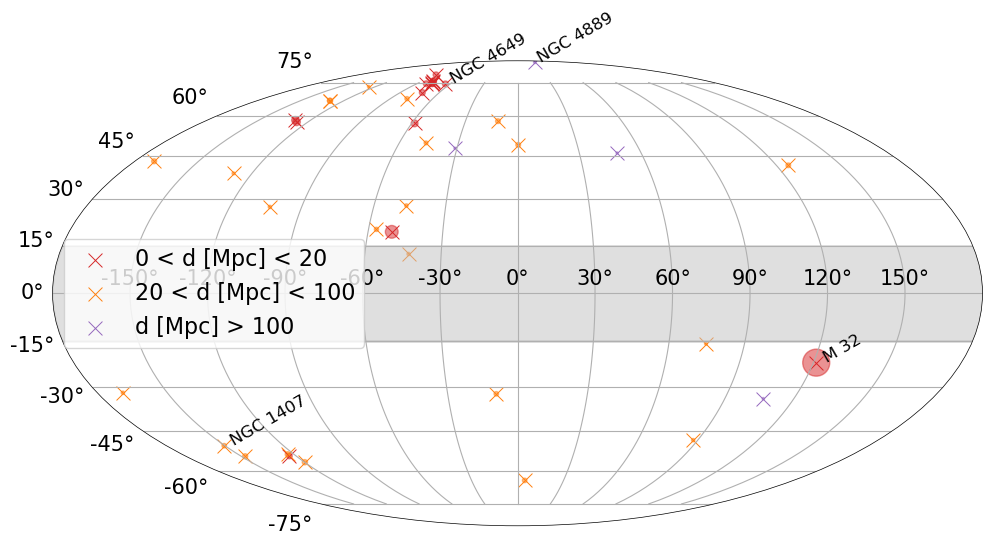

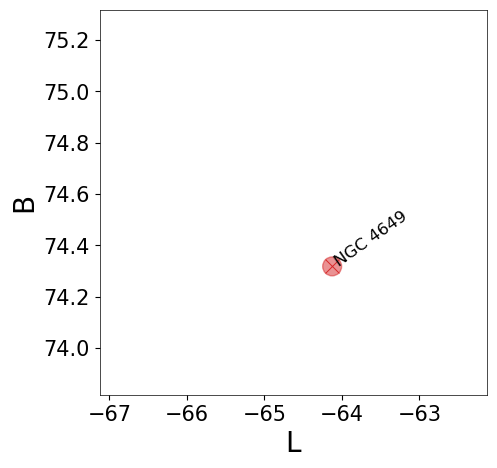

In [10]:
x = np.linspace(-np.pi, np.pi, 10)
y1 = np.full(len(x),  np.radians(-15))
y2 = np.full(len(x),  np.radians(+15))

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplot(111, projection="mollweide")

plt.scatter( np.radians(gal_l[gal_0_10_Mpc]),  np.radians(gal_b[gal_0_10_Mpc]), 
            s=dist_w[gal_0_10_Mpc], facecolors='tab:red', edgecolors='tab:red', alpha=0.5)
plt.scatter( np.radians(gal_l[gal_10_100_Mpc]),  np.radians(gal_b[gal_10_100_Mpc]), 
            s=dist_w[gal_10_100_Mpc], facecolors='tab:orange', edgecolors='tab:orange', alpha=0.5)
plt.scatter( np.radians(gal_l[gal_100_plus_Mpc]),  np.radians(gal_b[gal_100_plus_Mpc]), 
            s=dist_w[gal_100_plus_Mpc], facecolors='tab:purple', edgecolors='tab:purple', alpha=0.5)
plt.scatter( np.radians(gal_l[gal_0_10_Mpc]),  np.radians(gal_b[gal_0_10_Mpc]), 
            s=100, facecolors='tab:red', marker='x', label='0 < d [Mpc] < 20')
plt.scatter( np.radians(gal_l[gal_10_100_Mpc]),  np.radians(gal_b[gal_10_100_Mpc]), 
            s=100, facecolors='tab:orange',  marker='x', label='20 < d [Mpc] < 100')
plt.scatter( np.radians(gal_l[gal_100_plus_Mpc]),  np.radians(gal_b[gal_100_plus_Mpc]), 
            s=100, facecolors='tab:purple',  marker='x', label='d [Mpc] > 100')
plt.fill_between(x, y1, y2, color='silver', alpha=0.5)

for g in list_prints:
    print(g,' dist = ', gal_dist[df['Name'] == g])
    plt.text( np.radians(gal_l[df['Name'] == g]+2),  np.radians(gal_b[df['Name'] == g]), g, fontsize=12, rotation=30)
plt.legend(fontsize=16)
plt.grid('on')
plt.savefig('Map_elliptical_galaxies.pdf')




#------------ Zoom around NGC4889
fig, ax = plt.subplots(figsize=(5,5))
plt.subplot(111)
plt.scatter( gal_l[gal_0_10_Mpc],  gal_b[gal_0_10_Mpc], 
            s=10*dist_w[gal_0_10_Mpc], facecolors='tab:red', edgecolors='tab:red', alpha=0.5)
plt.scatter( gal_l[gal_10_100_Mpc],  gal_b[gal_10_100_Mpc], 
            s=10*dist_w[gal_10_100_Mpc], facecolors='tab:orange', edgecolors='tab:orange', alpha=0.7)
plt.scatter( gal_l[gal_100_plus_Mpc],  gal_b[gal_100_plus_Mpc], 
            s=10*dist_w[gal_100_plus_Mpc], facecolors='tab:purple', edgecolors='tab:purple', alpha=0.7)
plt.scatter( gal_l[gal_0_10_Mpc],  gal_b[gal_0_10_Mpc], 
            s=100, facecolors='tab:red', marker='x', label='0 < d[Mpc] < 20')
plt.scatter( gal_l[gal_10_100_Mpc],  gal_b[gal_10_100_Mpc], 
            s=100, facecolors='tab:orange',  marker='x', label='20 < d[Mpc] < 100')
plt.scatter( gal_l[gal_100_plus_Mpc],  gal_b[gal_100_plus_Mpc], 
            s=100, facecolors='tab:purple',  marker='x', label='d[Mpc] > 100')
plt.fill_between(x, y1, y2, color='silver', alpha=0.5)

g = 'NGC 4649'

plt.text(gal_l[df['Name'] == g], gal_b[df['Name'] == g], g, fontsize=12, rotation=35)
plt.xlim(gal_l[df['Name'] == g]-3, gal_l[df['Name'] == g]+2)
plt.ylim(gal_b[df['Name'] == g]-0.5, gal_b[df['Name'] == g]+1)
plt.xlabel('L', size=20)
plt.ylabel('B', size=20)

plt.show()



# Source ranking

In [11]:
def get_mass_weigths(_mass, index=3):
    w = np.power(_mass, index)
    w = w/np.nanmax(w)
    return w

def get_dist_weights(_dist, index=-2):
    _dist[_dist == 0.] = np.nan
    w = _dist**index
    w = w/np.nanmax(w)
    return w

In [12]:
w_m_gal = get_mass_weigths(gal_bhmass.astype(float))
w_d_gal = get_dist_weights(gal_dist.astype(float))
    
w_total = w_m_gal * w_d_gal / np.amax(w_m_gal * w_d_gal)

iii = np.argsort(w_total)[::-1]
gal_name_rank = gal_name[iii]
gal_w = w_total[iii]
gal_d_rank = gal_dist[iii]
gal_m_rank = gal_bhmass[iii]

print('#', 'Name', 'dist[Mpc]', 'mass[1e6M_sun]')
for i, g in enumerate(gal_name_rank):
    print(i, g.replace(' ', ''), gal_d_rank[i], gal_m_rank[i], gal_w[i])

# Name dist[Mpc] mass[1e6M_sun]
0 M32 0.805 895.0 1.0
1 NGC5128 3.62 898.0 0.04994988857002096
2 NGC3379 10.7 939.0 0.006536599497397437
3 NGC4697 12.54 883.0 0.0039573976590266515
4 NGC4486B 16.26 991.0 0.0033273810256805544
5 NGC4473 15.25 935.0 0.003177004281017578
6 NGC4649 16.46 947.0 0.002833432884993051
7 NGC4459 16.01 909.0 0.0026486931026673184
8 NGC4374 18.51 945.0 0.0022264105066541794
9 NGC4382 17.88 863.0 0.0018172723257936722
10 NGC1399 20.85 948.0 0.0017714771229656778
11 NGC1374 19.57 908.0 0.001766845395466923
12 NGC1332 22.66 931.0 0.0014205348301633937
13 NGC3608 22.75 921.0 0.0013643906776870814
14 NGC1316 20.95 871.0 0.0013608462635666912
15 NGC3607 22.65 911.0 0.0013321139399358698
16 NGC5845 25.87 973.0 0.0012441373213879041
17 NGC2778 23.44 911.0 0.0012438344210305842
18 NGC4291 26.58 927.0 0.0010191823734166355
19 NGC1407 29.0 969.0 0.0009779079800815418
20 NGC6861 28.71 962.0 0.0009762959459344893
21 IC1459 28.92 966.0 0.0009742209325646587
22 NGC5576 25.68 86

/var/folders/0s/rjv9nghd171dl20p_w8zd_dm6sg3f4/T/ipykernel_39507/1613633974.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  gal_bhmass[gal_bhmass == '...'] = np.nan


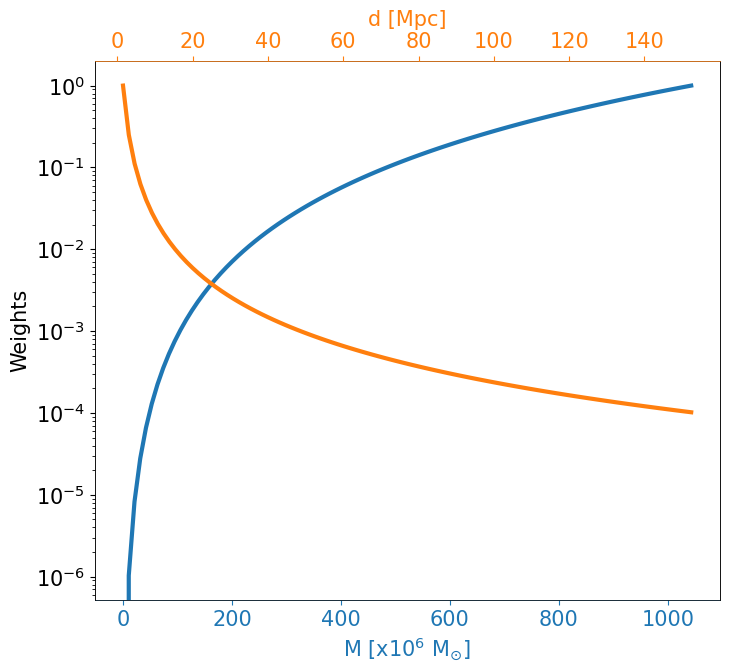

In [13]:
gal_bhmass[gal_bhmass == '...'] = np.nan
gal_bhmass = gal_bhmass.astype(float)

_d = np.linspace(0., np.nanmax(gal_dist), 100)
_m = np.linspace(0., np.nanmax(gal_bhmass.astype(float)), 100)

fig, ax = plt.subplots(figsize=(10,7))
fig.subplots_adjust(right=0.75)

ax1 = ax.twiny()

# ax.plot(gal_bhmass.astype(float), w_m_gal, 'o', color='tab:blue', linewidth=3)
ax.plot(_m, get_mass_weigths(_m), color='tab:blue', linewidth=3)
# ax1.plot(gal_dist.astype(float), w_d_gal, 'o', color='tab:orange', linewidth=3)
ax1.plot(_d, get_dist_weights(_d), color='tab:orange', linewidth=3)


plt.yscale('log')
ax.set_ylabel('Weights')

ax.set_xlabel('M [x10$^6$ M$_{\\odot}$]')
ax1.set_xlabel('d [Mpc]')

ax.xaxis.label.set_color('tab:blue')
ax1.xaxis.label.set_color('tab:orange')

ax.spines["bottom"].set_edgecolor('tab:blue')
ax1.spines["top"].set_edgecolor('tab:orange')

ax.tick_params(axis='x', colors='tab:blue')
ax1.tick_params(axis='x', colors='tab:orange')

plt.show()